### CITIBIKE ANALYSIS PROJECT


#### Libraries

In [1]:
# Libraries for reading and manipulating data
import numpy as np
import pandas as pd

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import contextily as ctx
import plotly.express as px

#display the graphs
%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 200)

### Reading Dataset


In [2]:
#read the csv file into a dataframe
cleaned_df = pd.read_csv('/Users/drushti/Documents/PythonProject/CitiBike/cleaned_df.csv')

In [3]:
#Creating GeoDataFrame for Start Station
gdf_start = gpd.GeoDataFrame(
    cleaned_df, geometry=gpd.points_from_xy(cleaned_df['start_lng'], cleaned_df['start_lat']), crs="EPSG:4326")

In [4]:
#Creating GeoDataFrame for End Station
gdf_end = gpd.GeoDataFrame(
    cleaned_df, geometry=gpd.points_from_xy(cleaned_df['end_lng'], cleaned_df['end_lat']), crs="EPSG:4326")

In [5]:
#Reading shape file for NJ boundary
nj_map = gpd.read_file('/Users/drushti/Documents/PythonProject/CitiBike/nj.geojson')

In [6]:
#EXTRACTING ZIPCODE AND GEOMETRY POINTS IN SEPERATE DATAFRAME
# ZCTA and zipcodede = https://help.healthycities.org/hc/en-us/articles/115006016767-What-is-the-difference-between-ZIP-Codes-and-ZCTAs-#:~:text=ZCTAs%20or%20ZIP%20Code%20Tabulation,same%20as%20its%20ZIP%20Code.
nj_map = nj_map[['ZCTA5CE10','geometry']]
nj_map.rename(columns={'ZCTA5CE10':'zipcode'},inplace=True)

#### EXTRACTING HUDSON COUNTY ZIPCODE FROM NJ BOUNDARY GEOJSON FILE

In [7]:
#### EXTRACTING ONLY ZIPCODE IN DATASET FROM NJ BOUNDARY FILE 
hudson_county = ['07302', '07030', '07307', '07306', '07310', '07304', '07311',
       '07305', '07032']
new_map = nj_map[nj_map['zipcode'].isin(hudson_county)]

#### SPATIAL JOIN - START STATION ZIPCODE

In [8]:
#Spatial Join on Geodataframe - https://geopandas.org/en/stable/gallery/spatial_joins.html

In [9]:
#PERFORMING SPATIAL JOINM TO MATCH START STATION ID WITH RESPECTIVE ZIPCODE
trip_start = gdf_start.sjoin(nj_map,how='left')

In [10]:
zip_null = trip_start[trip_start['zipcode'].isna()]
print(zip_null.shape)
zip_null['start_station_id'].value_counts()

(76, 22)


start_station_id
JC002      31
JC106       6
JC098       2
HB303       2
HB102       2
4824.03     1
7059.01     1
5922.04     1
5500.07     1
HB101       1
JC104       1
HB404       1
7123.04     1
6224.05     1
HB402       1
HB103       1
6889.12     1
HB607       1
5329.08     1
8262.07     1
8226.06     1
4617.01     1
5820.08     1
6659.09     1
5626.13     1
6560.15     1
8254.01     1
5065.14     1
4850.04     1
5616.01     1
6948.10     1
6747.07     1
6779.05     1
5065.04     1
5905.14     1
6756.05     1
5436.09     1
JC116       1
Name: count, dtype: int64

In [11]:
#### dropping rows with missing zipcode
ts_cleaned = trip_start.copy()
ts_cleaned.dropna(axis=0,inplace=True)
ts_cleaned.shape

(945267, 22)

#### SPATIAL JOIN - END STATION ZIPCODE

In [12]:
#PERFORMING SPATIAL JOIN TO MATCH END STATION ID WITH RESPECTIVE ZIPCODE
trip_end = gdf_end.sjoin(nj_map, how='left')
trip_end.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,member_casual,startweekday,endweekday,starttime,endtime,month,tripduration,geometry,index_right,zipcode
0,D68047AAA9A72501,classic_bike,2022-08-12 18:14:45,2022-08-12 18:21:23,Columbus Drive,JC014,Hamilton Park,JC009,40.718355,-74.038914,...,member,Friday,Friday,18,18,August,6.63,POINT (-74.04425 40.72760),414.0,07302
1,E5B82A9F588A7650,classic_bike,2022-08-19 01:04:39,2022-08-19 01:14:10,South Waterfront Walkway - Sinatra Dr & 1 St,HB103,8 St & Washington St,HB603,40.736982,-74.027781,...,member,Friday,Friday,1,1,August,9.52,POINT (-74.02820 40.74598),549.0,07030
2,AA0DBFF220DA98F6,classic_bike,2022-08-21 13:43:05,2022-08-21 13:53:13,Columbus Drive,JC014,Montgomery St,JC099,40.718355,-74.038914,...,member,Sunday,Sunday,13,13,August,10.13,POINT (-74.05099 40.71942),414.0,07302
3,8F11D340492FCD32,electric_bike,2022-08-04 22:02:12,2022-08-04 22:21:31,South Waterfront Walkway - Sinatra Dr & 1 St,HB103,Pershing Field,JC024,40.736982,-74.027781,...,member,Thursday,Thursday,22,22,August,19.32,POINT (-74.05179 40.74268),491.0,07307
4,48FF219B87E90004,electric_bike,2022-08-08 14:02:48,2022-08-08 14:16:11,Columbus Drive,JC014,Fairmount Ave,JC093,40.718355,-74.038914,...,member,Monday,Monday,14,14,August,13.38,POINT (-74.07196 40.72573),330.0,07306


In [13]:
end_zipnull = trip_end[trip_end['zipcode'].isnull()]
print(end_zipnull.shape)
end_zipnull['end_station_id'].value_counts()

(1401, 22)


end_station_id
5297.02    95
5470.10    61
5561.06    49
5065.10    45
5470.12    36
           ..
4060.09     1
5752.09     1
4243.01     1
6644.08     1
5128.04     1
Name: count, Length: 331, dtype: int64

In [14]:
#### dropping rows with missing zipcode
te_cleaned = trip_end.copy()
te_cleaned.dropna(axis=0,inplace=True)
te_cleaned.shape

(943942, 22)

In [15]:
#Renaming zipcode as start and end
te_cleaned.rename(columns={'zipcode':'zip_end'}, inplace = True)
ts_cleaned.rename(columns={'zipcode':'zip_start'}, inplace = True)

#### COMBINING START AND END GEODATAFRAME

In [16]:
#Combing start and end geodataframe and checking for missing zipcode
geo_df = ts_cleaned
geo_df['zip_end'] = te_cleaned['zip_end']
geo_df.isnull().sum()

ride_id                  0
rideable_type            0
started_at               0
ended_at                 0
start_station_name       0
start_station_id         0
end_station_name         0
end_station_id           0
start_lat                0
start_lng                0
end_lat                  0
end_lng                  0
member_casual            0
startweekday             0
endweekday               0
starttime                0
endtime                  0
month                    0
tripduration             0
geometry                 0
index_right              0
zip_start                0
zip_end               1372
dtype: int64

In [17]:
#dropping rows with missing zipcodes for end stations
geo_df.dropna(axis=0,inplace=True)
geo_df.shape

(943895, 23)

#### HOURLY CITIBIKE SURPLUS AND DEFICIT BY STATIONS

In [18]:
hrly_start = geo_df.groupby(['starttime','start_station_name'],as_index=False)[['ride_id']].count()
hrly_start.columns = ['hour','start_station','start_count']
hrly_start.head()

,hour,start_station,start_count
0,0,11 St & Washington St,210
1,0,12 St & Sinatra Dr N,194
2,0,14 St Ferry - 14 St & Shipyard Ln,175
3,0,2 St & Park Ave,88
4,0,4 St & Grand St,135


In [19]:
hrly_end = geo_df.groupby(['endtime','end_station_name'],as_index=False)[['ride_id']].count()
hrly_end.columns = ['hour','end_station','end_count']
hrly_end.head()

,hour,end_station,end_count
0,0,11 St & Washington St,311
1,0,12 St & Sinatra Dr N,335
2,0,14 St Ferry - 14 St & Shipyard Ln,317
3,0,2 St & Park Ave,62
4,0,4 St & Grand St,190


In [20]:
station_hrly = hrly_start.merge(hrly_end,
                                  left_on = ['hour','start_station'],
                                  right_on = ['hour','end_station'],
                                  how = 'outer')
station_hrly

,hour,start_station,start_count,end_station,end_count
0,0,11 St & Washington St,210.0,11 St & Washington St,311
1,0,12 St & Sinatra Dr N,194.0,12 St & Sinatra Dr N,335
2,0,14 St Ferry - 14 St & Shipyard Ln,175.0,14 St Ferry - 14 St & Shipyard Ln,317
3,0,2 St & Park Ave,88.0,2 St & Park Ave,62
4,0,4 St & Grand St,135.0,4 St & Grand St,190
...,...,...,...,...,...
1990,23,Willow Ave & 12 St,182.0,Willow Ave & 12 St,214
1991,23,York St & Marin Blvd,73.0,York St & Marin Blvd,45
1992,4,NaN,NaN,Grand St & 14 St,20
1993,14,NaN,NaN,Grove St - PATH,1


In [21]:
station_hrly['sur/def'] = (station_hrly['end_count'] - station_hrly['start_count'])
station_hrly['avg_sur/def'] = (station_hrly['end_count'] - station_hrly['start_count'])/365
station_hrly.head()

,hour,start_station,start_count,end_station,end_count,sur/def,avg_sur/def
0,0,11 St & Washington St,210.0,11 St & Washington St,311,101.0,0.276712
1,0,12 St & Sinatra Dr N,194.0,12 St & Sinatra Dr N,335,141.0,0.386301
2,0,14 St Ferry - 14 St & Shipyard Ln,175.0,14 St Ferry - 14 St & Shipyard Ln,317,142.0,0.389041
3,0,2 St & Park Ave,88.0,2 St & Park Ave,62,-26.0,-0.071233
4,0,4 St & Grand St,135.0,4 St & Grand St,190,55.0,0.150685


In [22]:
d = station_hrly.groupby('hour',as_index=False)[['sur/def']].agg(['min','max'])
d = d['sur/def'].reset_index()
d

,hour,min,max
0,0,-672.0,242.0
1,1,-377.0,142.0
2,2,-283.0,97.0
3,3,-126.0,53.0
4,4,-100.0,214.0
5,5,-464.0,767.0
6,6,-732.0,2377.0
7,7,-1338.0,5943.0
8,8,-1475.0,6765.0
9,9,-499.0,2695.0


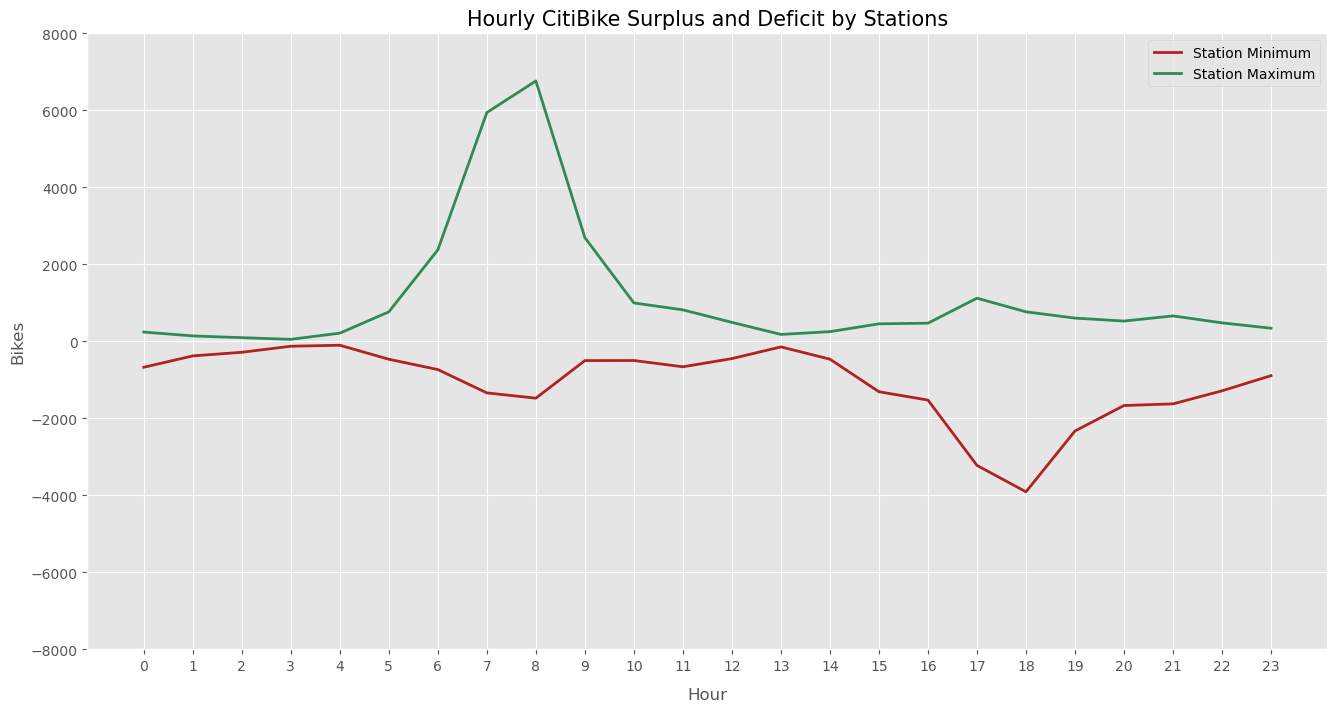

In [23]:
# line graph of hourly zipcode surplus and deficit

fig, ax = plt.subplots(figsize=(16,8)) # w x h

x = np.arange(24)
  

d.plot(ax=ax, x = 'hour', y = 'min', color = 'firebrick', linewidth = 2)
d.plot(ax=ax, x = 'hour', y = 'max', color = 'seagreen', linewidth = 2)

plt.xticks(x)
plt.xlabel("Hour", labelpad = 10)

plt.ylabel("Bikes")
plt.legend(['Station Minimum', 'Station Maximum'])
ax.set_ylim(-8000,8000)
plt.title('Hourly CitiBike Surplus and Deficit by Stations', fontsize = 15)
plt.show()

In [24]:
### Splitting DataFrame into Weekdays an Weekends by using Filter
# Filter out weekdays vs weekends
list1 = ['Monday','Tuesday','Wednesday','Thursday','Friday']
list2 = ['Saturday','Sunday']
weekdays = geo_df[geo_df['startweekday'].isin(list1)]
weekends = geo_df[geo_df['startweekday'].isin(list2)]

#### HOURLY CITIBIKE SURPLUS AND DEFICIT BY STATIONS FOR WEEKDAYS

#### Weekdays

In [25]:
weekday_start = weekdays.groupby(['starttime','start_station_name'],as_index=False)[['ride_id']].count()
weekday_start.columns = ['hour','start_station','start_count']
weekday_start.head()

,hour,start_station,start_count
0,0,11 St & Washington St,82
1,0,12 St & Sinatra Dr N,85
2,0,14 St Ferry - 14 St & Shipyard Ln,65
3,0,2 St & Park Ave,50
4,0,4 St & Grand St,51


In [26]:
weekday_end = weekdays.groupby(['endtime','end_station_name'],as_index=False)[['ride_id']].count()
weekday_end.columns = ['hour','end_station','end_count']
weekday_end.head()

,hour,end_station,end_count
0,0,11 St & Washington St,117
1,0,12 St & Sinatra Dr N,158
2,0,14 St Ferry - 14 St & Shipyard Ln,165
3,0,2 St & Park Ave,28
4,0,4 St & Grand St,90


In [27]:
station_hrly = weekday_start.merge(weekday_end,
                                  left_on = ['hour','start_station'],
                                  right_on = ['hour','end_station'],
                                  how = 'outer')
station_hrly

,hour,start_station,start_count,end_station,end_count
0,0,11 St & Washington St,82.0,11 St & Washington St,117.0
1,0,12 St & Sinatra Dr N,85.0,12 St & Sinatra Dr N,158.0
2,0,14 St Ferry - 14 St & Shipyard Ln,65.0,14 St Ferry - 14 St & Shipyard Ln,165.0
3,0,2 St & Park Ave,50.0,2 St & Park Ave,28.0
4,0,4 St & Grand St,51.0,4 St & Grand St,90.0
...,...,...,...,...,...
1989,3,NaN,NaN,Monmouth and 6th,2.0
1990,4,NaN,NaN,Columbus Dr at Exchange Pl,49.0
1991,4,NaN,NaN,Grand St & 14 St,11.0
1992,14,NaN,NaN,Grove St - PATH,1.0


In [28]:
station_hrly['sur/def'] = (station_hrly['end_count'] - station_hrly['start_count']) 
station_hrly['avg_surplus'] = np.round(station_hrly['sur/def'] /365 ,2)

station_hrly.head()



,hour,start_station,start_count,end_station,end_count,sur/def,avg_surplus
0,0,11 St & Washington St,82.0,11 St & Washington St,117.0,35.0,0.10
1,0,12 St & Sinatra Dr N,85.0,12 St & Sinatra Dr N,158.0,73.0,0.20
2,0,14 St Ferry - 14 St & Shipyard Ln,65.0,14 St Ferry - 14 St & Shipyard Ln,165.0,100.0,0.27
3,0,2 St & Park Ave,50.0,2 St & Park Ave,28.0,-22.0,-0.06
4,0,4 St & Grand St,51.0,4 St & Grand St,90.0,39.0,0.11


In [29]:
d = station_hrly.groupby('hour',as_index=False)[['sur/def']].agg(['min','max'])
d = d['sur/def'].reset_index()
d

,hour,min,max
0,0,-295.0,129.0
1,1,-117.0,51.0
2,2,-53.0,45.0
3,3,-21.0,29.0
4,4,-99.0,221.0
5,5,-379.0,645.0
6,6,-723.0,2306.0
7,7,-1322.0,5783.0
8,8,-1430.0,6463.0
9,9,-401.0,2365.0


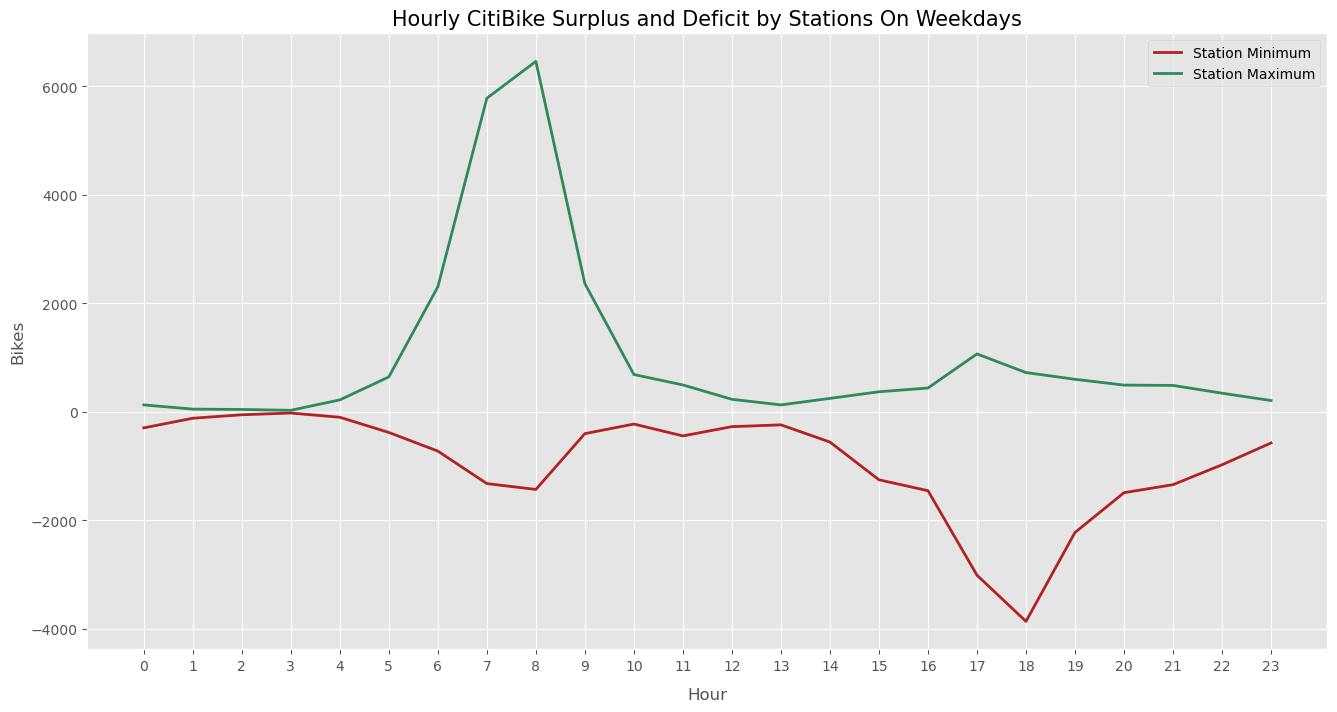

In [30]:
# line graph of hourly zipcode surplus and deficit

fig, ax = plt.subplots(figsize=(16,8)) # w x h

x = np.arange(24)
  

d.plot(ax=ax, x = 'hour', y = 'min', color = 'firebrick', linewidth = 2)
d.plot(ax=ax, x = 'hour', y = 'max', color = 'seagreen', linewidth = 2)

plt.xticks(x)
plt.xlabel("Hour", labelpad = 10)

plt.ylabel("Bikes")
plt.legend(['Station Minimum', 'Station Maximum'])

plt.title('Hourly CitiBike Surplus and Deficit by Stations On Weekdays', fontsize = 15)
plt.show()

#### Weekends

In [31]:
weekend_start = weekends.groupby(['starttime','start_station_name'],as_index=False)[['ride_id']].count()
weekend_start.columns = ['hour','start_station','start_count']
weekend_start.head()

,hour,start_station,start_count
0,0,11 St & Washington St,128
1,0,12 St & Sinatra Dr N,109
2,0,14 St Ferry - 14 St & Shipyard Ln,110
3,0,2 St & Park Ave,38
4,0,4 St & Grand St,84


In [32]:
weekend_end = weekends.groupby(['endtime','end_station_name'],as_index=False)[['ride_id']].count()
weekend_end.columns = ['hour','end_station','end_count']
weekend_end.head()

,hour,end_station,end_count
0,0,11 St & Washington St,194
1,0,12 St & Sinatra Dr N,177
2,0,14 St Ferry - 14 St & Shipyard Ln,152
3,0,2 St & Park Ave,34
4,0,4 St & Grand St,100


In [33]:
station_hrly = weekend_start.merge(weekend_end,
                                  left_on = ['hour','start_station'],
                                  right_on = ['hour','end_station'],
                                  how = 'outer')
station_hrly

,hour,start_station,start_count,end_station,end_count
0,0,11 St & Washington St,128.0,11 St & Washington St,194.0
1,0,12 St & Sinatra Dr N,109.0,12 St & Sinatra Dr N,177.0
2,0,14 St Ferry - 14 St & Shipyard Ln,110.0,14 St Ferry - 14 St & Shipyard Ln,152.0
3,0,2 St & Park Ave,38.0,2 St & Park Ave,34.0
4,0,4 St & Grand St,84.0,4 St & Grand St,100.0
...,...,...,...,...,...
1987,4,NaN,NaN,Grand St & 14 St,9.0
1988,4,NaN,NaN,Madison St & 10 St,9.0
1989,4,NaN,NaN,Monmouth and 6th,8.0
1990,4,NaN,NaN,Pershing Field,26.0


In [34]:
station_hrly['sur/def'] = (station_hrly['end_count'] - station_hrly['start_count'])
station_hrly['avg_surplus'] = np.round(station_hrly['sur/def'] /365 ,2)
station_hrly.head()

,hour,start_station,start_count,end_station,end_count,sur/def,avg_surplus
0,0,11 St & Washington St,128.0,11 St & Washington St,194.0,66.0,0.18
1,0,12 St & Sinatra Dr N,109.0,12 St & Sinatra Dr N,177.0,68.0,0.19
2,0,14 St Ferry - 14 St & Shipyard Ln,110.0,14 St Ferry - 14 St & Shipyard Ln,152.0,42.0,0.12
3,0,2 St & Park Ave,38.0,2 St & Park Ave,34.0,-4.0,-0.01
4,0,4 St & Grand St,84.0,4 St & Grand St,100.0,16.0,0.04


In [35]:
d = station_hrly.groupby('hour',as_index=False)[['sur/def']].agg(['min','max'])
d = d['sur/def'].reset_index()
d

,hour,min,max
0,0,-377.0,135.0
1,1,-277.0,102.0
2,2,-231.0,81.0
3,3,-106.0,44.0
4,4,-21.0,28.0
5,5,-85.0,149.0
6,6,-86.0,150.0
7,7,-111.0,160.0
8,8,-218.0,302.0
9,9,-305.0,332.0


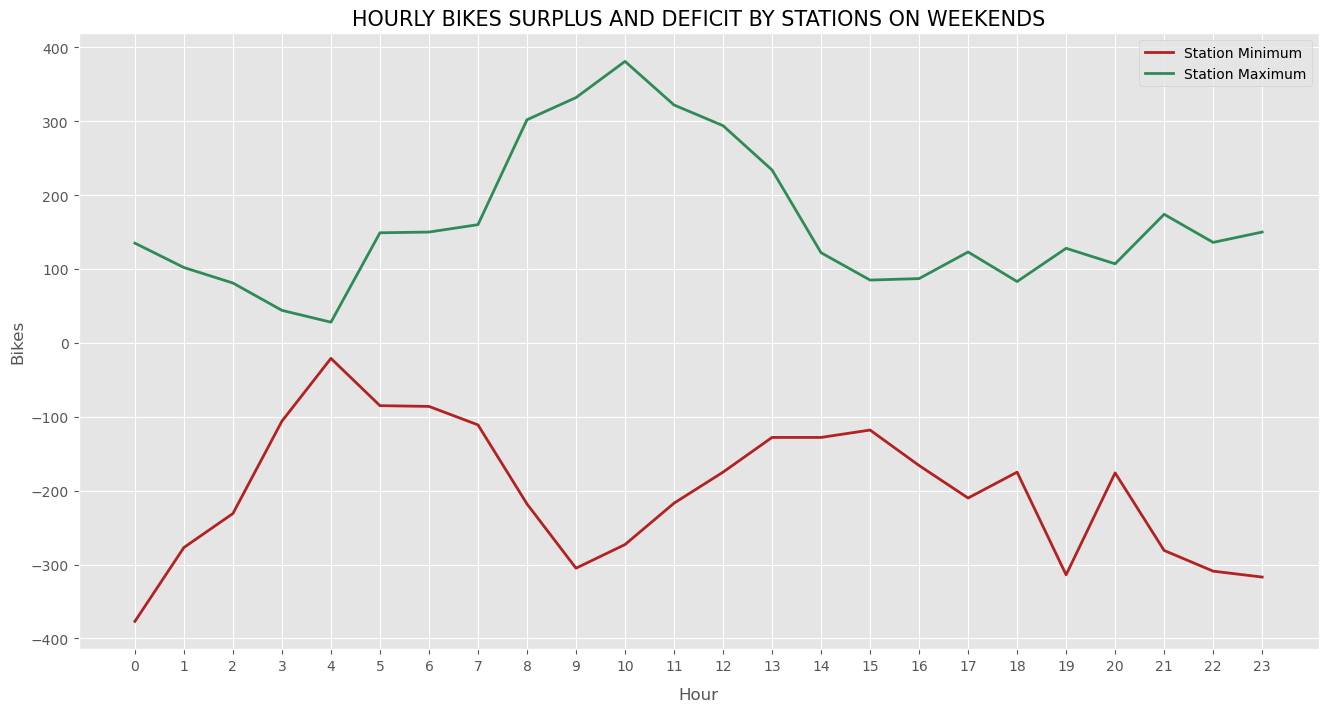

In [36]:
# line graph of hourly zipcode surplus and deficit

fig, ax = plt.subplots(figsize=(16,8)) # w x h

x = np.arange(24)
  

d.plot(ax=ax, x = 'hour', y = 'min', color = 'firebrick', linewidth = 2)
d.plot(ax=ax, x = 'hour', y = 'max', color = 'seagreen', linewidth = 2)

plt.xticks(x)
plt.xlabel("Hour", labelpad = 10)

plt.ylabel("Bikes")
plt.legend(['Station Minimum', 'Station Maximum'])

plt.title('HOURLY BIKES SURPLUS AND DEFICIT BY STATIONS ON WEEKENDS', fontsize = 15)
plt.show()

In [37]:
#### Stations with highest surplus and deficit 

In [38]:
starts_hrly = geo_df.groupby(['starttime','start_station_name'], as_index = False)[['ride_id']].count()
starts_hrly.columns = ['hour','start_station','start_count']
starts_hrly

,hour,start_station,start_count
0,0,11 St & Washington St,210
1,0,12 St & Sinatra Dr N,194
2,0,14 St Ferry - 14 St & Shipyard Ln,175
3,0,2 St & Park Ave,88
4,0,4 St & Grand St,135
...,...,...,...
1987,23,Van Vorst Park,186
1988,23,Warren St,240
1989,23,Washington St,278
1990,23,Willow Ave & 12 St,182


In [39]:
ends_hrly = geo_df.groupby(['endtime','end_station_name'], as_index = False)[['ride_id']].count()
ends_hrly.columns = ['hour','end_station','end_count']
ends_hrly

,hour,end_station,end_count
0,0,11 St & Washington St,311
1,0,12 St & Sinatra Dr N,335
2,0,14 St Ferry - 14 St & Shipyard Ln,317
3,0,2 St & Park Ave,62
4,0,4 St & Grand St,190
...,...,...,...
1990,23,Van Vorst Park,277
1991,23,Warren St,261
1992,23,Washington St,209
1993,23,Willow Ave & 12 St,214


In [40]:
supply_hrly = starts_hrly.merge(ends_hrly,
                               left_on = ['hour','start_station'],
                               right_on = ['hour','end_station'],
                               how = 'outer')
supply_hrly.head(5)

,hour,start_station,start_count,end_station,end_count
0,0,11 St & Washington St,210.0,11 St & Washington St,311
1,0,12 St & Sinatra Dr N,194.0,12 St & Sinatra Dr N,335
2,0,14 St Ferry - 14 St & Shipyard Ln,175.0,14 St Ferry - 14 St & Shipyard Ln,317
3,0,2 St & Park Ave,88.0,2 St & Park Ave,62
4,0,4 St & Grand St,135.0,4 St & Grand St,190


In [41]:
supply_hrly['start_count'].fillna(0, inplace=True)
supply_hrly['end_count'].fillna(0, inplace=True)

In [42]:
supply_hrly['hrly_surplus'] = (supply_hrly['end_count'] - supply_hrly['start_count'])/365
supply_hrly.sort_values(by = 'hrly_surplus').head(6)

,hour,start_station,start_count,end_station,end_count,hrly_surplus
1533,18,Grove St PATH,6821.0,Grove St PATH,2914,-10.704110
1456,17,Hoboken Terminal - River St & Hudson Pl,6553.0,Hoboken Terminal - River St & Hudson Pl,3332,-8.824658
1449,17,Grove St PATH,5884.0,Grove St PATH,2986,-7.939726
1540,18,Hoboken Terminal - River St & Hudson Pl,5786.0,Hoboken Terminal - River St & Hudson Pl,3170,-7.167123
1616,19,Grove St PATH,4485.0,Grove St PATH,2158,-6.375342
1425,17,Bergen Ave & Sip Ave,2759.0,Bergen Ave & Sip Ave,1072,-4.621918


In [43]:
supply_hrly.sort_values(by = 'hrly_surplus', ascending = False).head(20)

,hour,start_station,start_count,end_station,end_count,hrly_surplus
702,8,Grove St PATH,1286.0,Grove St PATH,8051,18.534247
619,7,Grove St PATH,896.0,Grove St PATH,6839,16.282192
626,7,Hoboken Terminal - River St & Hudson Pl,675.0,Hoboken Terminal - River St & Hudson Pl,4764,11.202740
709,8,Hoboken Terminal - River St & Hudson Pl,1478.0,Hoboken Terminal - River St & Hudson Pl,4358,7.890411
785,9,Grove St PATH,1076.0,Grove St PATH,3771,7.383562
543,6,Hoboken Terminal - River St & Hudson Pl,244.0,Hoboken Terminal - River St & Hudson Pl,2621,6.512329
536,6,Grove St PATH,750.0,Grove St PATH,3067,6.347945
625,7,Hoboken Terminal - Hudson St & Hudson Pl,822.0,Hoboken Terminal - Hudson St & Hudson Pl,2903,5.701370
595,7,Bergen Ave & Sip Ave,303.0,Bergen Ave & Sip Ave,2361,5.638356
678,8,Bergen Ave & Sip Ave,607.0,Bergen Ave & Sip Ave,2522,5.246575


In [44]:
supply_hrly.sort_values(by = 'hrly_surplus', ascending = True).head(20)

,hour,start_station,start_count,end_station,end_count,hrly_surplus
1533,18,Grove St PATH,6821.0,Grove St PATH,2914,-10.704110
1456,17,Hoboken Terminal - River St & Hudson Pl,6553.0,Hoboken Terminal - River St & Hudson Pl,3332,-8.824658
1449,17,Grove St PATH,5884.0,Grove St PATH,2986,-7.939726
1540,18,Hoboken Terminal - River St & Hudson Pl,5786.0,Hoboken Terminal - River St & Hudson Pl,3170,-7.167123
1616,19,Grove St PATH,4485.0,Grove St PATH,2158,-6.375342
1425,17,Bergen Ave & Sip Ave,2759.0,Bergen Ave & Sip Ave,1072,-4.621918
1699,20,Grove St PATH,3222.0,Grove St PATH,1556,-4.564384
1782,21,Grove St PATH,2574.0,Grove St PATH,951,-4.446575
1509,18,Bergen Ave & Sip Ave,2681.0,Bergen Ave & Sip Ave,1105,-4.317808
1366,16,Grove St PATH,3714.0,Grove St PATH,2190,-4.175342


In [45]:
# separate hourly changes in supply for 5 stations with the greatest surplus/deficit peaks
station1 = supply_hrly[supply_hrly['start_station'] == 'Grove St PATH']
station2 = supply_hrly[supply_hrly['start_station'] == 'Hoboken Terminal - River St & Hudson Pl']
station3 = supply_hrly[supply_hrly['start_station'] == 'Bergen Ave & Sip Ave']
station4 = supply_hrly[supply_hrly['start_station'] == 'City Hall - Washington St & 1 St']
station5 = supply_hrly[supply_hrly['start_station'] == 'South Waterfront Walkway - Sinatra Dr & 1 St']


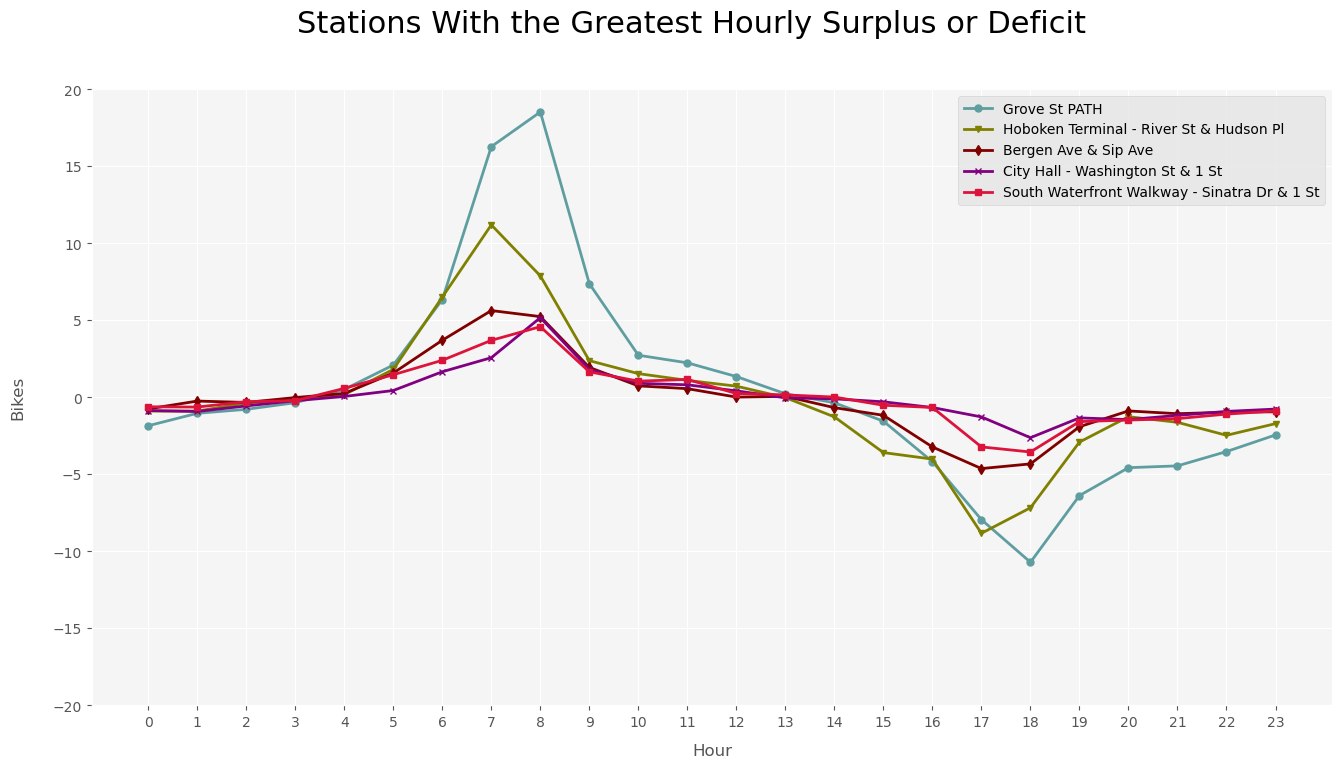

In [46]:
fig,ax1= plt.subplots(figsize=(16, 8))

fig.suptitle('Stations With the Greatest Hourly Surplus or Deficit', fontsize=22)

# line graph depicting hourly surplus and deficit for 5 stations

x = np.arange(24)
station1.plot(ax=ax1, x = 'hour', y = 'hrly_surplus', marker='o', markerfacecolor='cadetblue', markersize=5, color='cadetblue', linewidth=2)
station2.plot(ax=ax1, x = 'hour', y = 'hrly_surplus', marker='v', markerfacecolor='olive', markersize=5, color='olive', linewidth=2)
station3.plot(ax=ax1, x = 'hour', y = 'hrly_surplus',marker='d', markerfacecolor='maroon', markersize=5, color='maroon', linewidth=2)
station4.plot(ax=ax1, x = 'hour', y = 'hrly_surplus', marker='x', markerfacecolor='violet', markersize=5, color='purple', linewidth=2)
station5.plot(ax=ax1, x = 'hour', y = 'hrly_surplus', marker='s', markerfacecolor='crimson', markersize=5, color='crimson', linewidth=2)

ax1.set_xticks(x)
ax1.set_xlabel('Hour', labelpad = 10)
ax1.set_ylabel('Bikes', labelpad = 20)
ax1.set_ylim(-20, 20)
ax1.set_facecolor("whitesmoke")
ax1.legend(['Grove St PATH','Hoboken Terminal - River St & Hudson Pl','Bergen Ave & Sip Ave','City Hall - Washington St & 1 St','South Waterfront Walkway - Sinatra Dr & 1 St'])


In [47]:
station1 = ts_cleaned[ts_cleaned['start_station_name']=='Grove St PATH'].head(1)

station2 = ts_cleaned[ts_cleaned['start_station_name']=='Hoboken Terminal - River St & Hudson Pl'].head(1)

station3 = ts_cleaned[ts_cleaned['start_station_name']=='Bergen Ave & Sip Ave'].head(1)

station4 = ts_cleaned[ts_cleaned['start_station_name']=='City Hall - Washington St & 1 St'].head(1)

station5 = ts_cleaned[ts_cleaned['start_station_name']=='South Waterfront Walkway - Sinatra Dr & 1 St'].head(1)





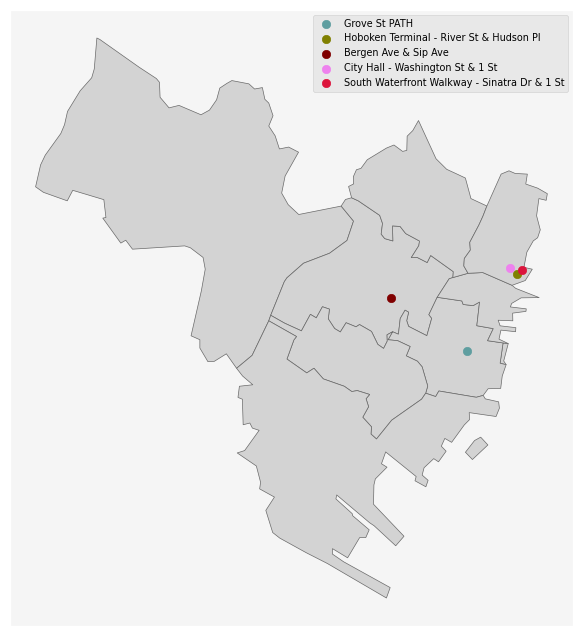

In [48]:
fig,ax2= plt.subplots(figsize=(16, 8))

new_map.plot(ax=ax2, color='lightgrey', edgecolor = 'dimgray')
station1.plot(ax=ax2, color = 'cadetblue')
station2.plot(ax=ax2, color = 'olive')
station3.plot(ax=ax2, color = 'maroon')
station4.plot(ax=ax2, color = 'violet')
station5.plot(ax=ax2,  color = 'crimson')



ax2.set_facecolor("whitesmoke")
ax2.grid(False)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.legend(['Grove St PATH','Hoboken Terminal - River St & Hudson Pl','Bergen Ave & Sip Ave','City Hall - Washington St & 1 St','South Waterfront Walkway - Sinatra Dr & 1 St'],fontsize='x-small',loc='best')
